# 🧹 Data Preprocessing and Gower Distance Matrix

This section handles **data cleaning** and calculates a **Gower distance matrix**, which is suitable for mixed-type data (numerical + categorical).

---

## 🔹 Steps

### 1. Load Dataset
- Import the dataset (`307.xlsx`) into a pandas DataFrame.
- Use `Response_ID` as the index.

### 2. Handle Missing Values
- Replace string representations of missing values (`"na"`, `"NaN"`, `"null"`, etc.) with `NaN`.
- Convert object columns to numeric where possible.
- Fill missing values:
  - **Numeric columns** → median  
  - **Categorical columns** → most frequent value (mode)  

### 3. Define Categorical Variables
- Explicitly mark categorical features:  
  - `SEX`  
  - `COUNTRY`  

### 4. Compute Gower Distance
- Use the `gower` package to calculate the pairwise Gower distance matrix.  
- This method allows handling both categorical and continuous variables simultaneously.  

### 5. Save Results
- Store the full Gower distance matrix as a CSV file:  
  `gower_distance_matrix_final.csv`  

---

📌 **Output**  
- The Gower distance matrix is successfully calculated and saved for later clustering analysis.  


In [2]:
import pandas as pd
import numpy as np
import gower

# Load and perform basic data cleaning

df = pd.read_excel("307.xlsx") 
df.set_index('Response_ID', inplace=True)

# Replace all string representations of missing values
df = df.replace(['na', 'NA', 'N/A', 'NaN', 'nan', 'null', 'NULL', ''], np.nan)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass
    df[col].fillna(df[col].median() if df[col].dtype != 'object' else df[col].mode()[0], inplace=True)

# Explicitly specify categorical variables
cat_cols = ['SEX', 'COUNTRY']
cat_bool = [col in cat_cols for col in df.columns]

# Calculate the distance matrix
gower_matrix = gower.gower_matrix(df)
distance_df = pd.DataFrame(gower_matrix, index=df.index, columns=df.index)
distance_df.to_csv('gower_distance_matrix_final.csv')

print("Matrix successfully calculated and saved!")

Matrix successfully calculated and saved!


/var/folders/9b/sgc5xlc54js50h7m2vx4f06c0000gn/T/ipykernel_41645/1868823477.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['na', 'NA', 'N/A', 'NaN', 'nan', 'null', 'NULL', ''], np.nan)
/var/folders/9b/sgc5xlc54js50h7m2vx4f06c0000gn/T/ipykernel_41645/1868823477.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation

In [3]:
gower_matrix

array([[0.0000000e+00, 2.9460785e-01, 3.4662241e-01, ..., 2.1239254e-01,
        2.1205883e-01, 2.1779212e-01],
       [2.9460785e-01, 0.0000000e+00, 3.2123023e-01, ..., 2.7405921e-01,
        2.7372548e-01, 2.7945879e-01],
       [3.4662241e-01, 3.2123023e-01, 0.0000000e+00, ..., 2.2050436e-01,
        2.2083808e-01, 2.1970864e-01],
       ...,
       [2.1239254e-01, 2.7405921e-01, 2.2050436e-01, ..., 0.0000000e+00,
        3.3371654e-04, 5.3995871e-03],
       [2.1205883e-01, 2.7372548e-01, 2.2083808e-01, ..., 3.3371654e-04,
        0.0000000e+00, 5.7333037e-03],
       [2.1779212e-01, 2.7945879e-01, 2.1970864e-01, ..., 5.3995871e-03,
        5.7333037e-03, 0.0000000e+00]], dtype=float32)

In [4]:
distance_df

Response_ID,17,18,19,21,22,23,24,26,27,28,...,869,870,871,872,873,874,875,AVERAGE,MEDIAN,SD
Response_ID,,,,,,,,,,,,,,,,,,,,,
17,0.000000,0.294608,0.346622,0.270307,0.248403,0.284617,0.336205,0.264415,0.264263,0.303204,...,0.251132,0.319573,0.311388,0.445977,0.269949,0.350139,0.286749,0.212393,0.212059,0.217792
18,0.294608,0.000000,0.321230,0.275503,0.288893,0.285892,0.225323,0.361376,0.233381,0.271733,...,0.344171,0.355553,0.336192,0.330781,0.313969,0.449453,0.277435,0.274059,0.273725,0.279459
19,0.346622,0.321230,0.000000,0.225361,0.260319,0.205357,0.300867,0.398969,0.269709,0.279630,...,0.389608,0.274519,0.196139,0.332688,0.250297,0.254497,0.263656,0.220504,0.220838,0.219709
21,0.270307,0.275503,0.225361,0.000000,0.232492,0.159023,0.306651,0.270408,0.228593,0.192309,...,0.245361,0.287135,0.127381,0.379813,0.190553,0.290838,0.185291,0.127209,0.126875,0.132609
22,0.248403,0.288893,0.260319,0.232492,0.000000,0.195942,0.296512,0.279877,0.247865,0.291467,...,0.294045,0.276996,0.268223,0.451243,0.270610,0.219130,0.253583,0.154325,0.153991,0.159724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0.350139,0.449453,0.254497,0.290838,0.219130,0.248090,0.374972,0.323295,0.347736,0.357657,...,0.306850,0.292963,0.265563,0.489956,0.277343,0.000000,0.304845,0.220100,0.220433,0.223225
875,0.286749,0.277435,0.263656,0.185291,0.253583,0.215288,0.321385,0.332138,0.292188,0.229560,...,0.306205,0.290863,0.209674,0.371752,0.208071,0.304845,0.000000,0.199534,0.199200,0.204933
AVERAGE,0.212393,0.274059,0.220504,0.127209,0.154325,0.130735,0.280362,0.220337,0.190694,0.220694,...,0.238427,0.225299,0.173506,0.425429,0.178813,0.220100,0.199534,0.000000,0.000334,0.005400


# 📏 Inspecting the Gower Distance Matrix

- Check the matrix dimensions (should be square: n × n).  
- Preview the first 5 rows and columns (rounded).  
- Show basic stats: min, max, and average distance.  
- Save values as a NumPy array for further analysis.  

In [6]:
# Display the matrix dimensions

print(f"Matrix dimensions: {distance_df.shape}")  # Должно быть (310, 310)

# Show a small portion of the matrix for preview
print("\nFirst 5 rows and columns of the distance matrix:")
print(distance_df.iloc[:5, :5].round(4))

# Display information about the matrix
print("\nDistance matrix information:")
print(f"Minimum distance: {distance_df.values.min().round(4)}")
print(f"Maximum distance: {distance_df.values.max().round(4)}")
print(f"Average distance:  {distance_df.values.mean().round(4)}")

# Save to a variable for further analysis
gower_dist_matrix = distance_df.values

Matrix dimensions: (310, 310)

First 5 rows and columns of the distance matrix:
Response_ID      17      18      19      21      22
Response_ID                                        
17           0.0000  0.2946  0.3466  0.2703  0.2484
18           0.2946  0.0000  0.3212  0.2755  0.2889
19           0.3466  0.3212  0.0000  0.2254  0.2603
21           0.2703  0.2755  0.2254  0.0000  0.2325
22           0.2484  0.2889  0.2603  0.2325  0.0000

Distance matrix information:
Minimum distance: 0.0
Maximum distance: 0.6413000226020813
Average distance:  0.2865999937057495


# 📊 Distribution of Gower Distances

- Plot the distribution of all pairwise Gower distances.  
- Use a histogram with KDE to visualize similarity/dissimilarity among respondents.  
- Save the figure as `gower_distance_distribution.png`.  

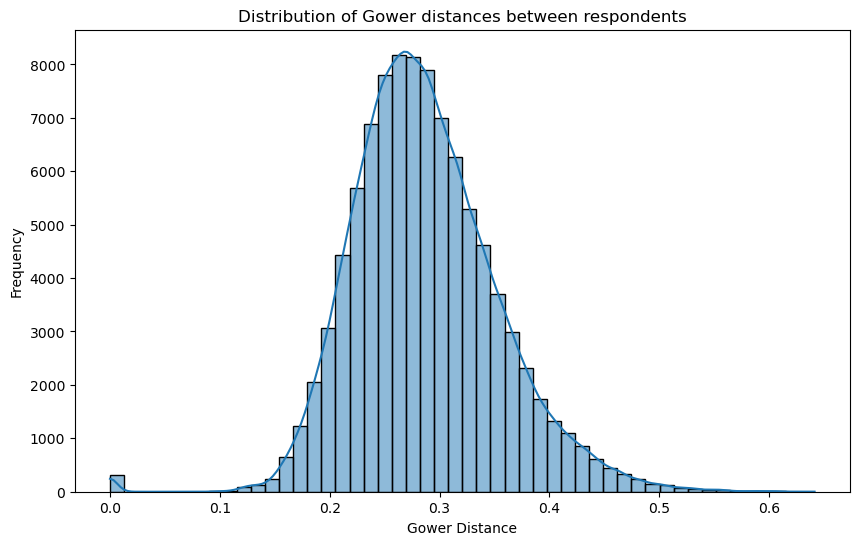

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(gower_matrix.flatten(), bins=50, kde=True)
plt.title('Distribution of Gower distances between respondents')
plt.xlabel('Gower Distance')
plt.ylabel('Frequency')
plt.savefig('gower_distance_distribution.png')
plt.show()

# 🔗 Agglomerative Clustering with Gower Distance

- Test cluster sizes **k = 2–10** using Agglomerative Clustering with precomputed Gower distances.  
- Compute and plot **silhouette scores** to find the optimal number of clusters.  
- Select the best k and run final clustering.  
- Add cluster labels to the dataset and show cluster sizes.  

Clusters: 2, Silhouette Score: 0.2195
Clusters: 3, Silhouette Score: 0.1693
Clusters: 4, Silhouette Score: 0.1239
Clusters: 5, Silhouette Score: 0.0791
Clusters: 6, Silhouette Score: 0.0656
Clusters: 7, Silhouette Score: 0.0505
Clusters: 8, Silhouette Score: 0.0442
Clusters: 9, Silhouette Score: 0.0627
Clusters: 10, Silhouette Score: 0.0450


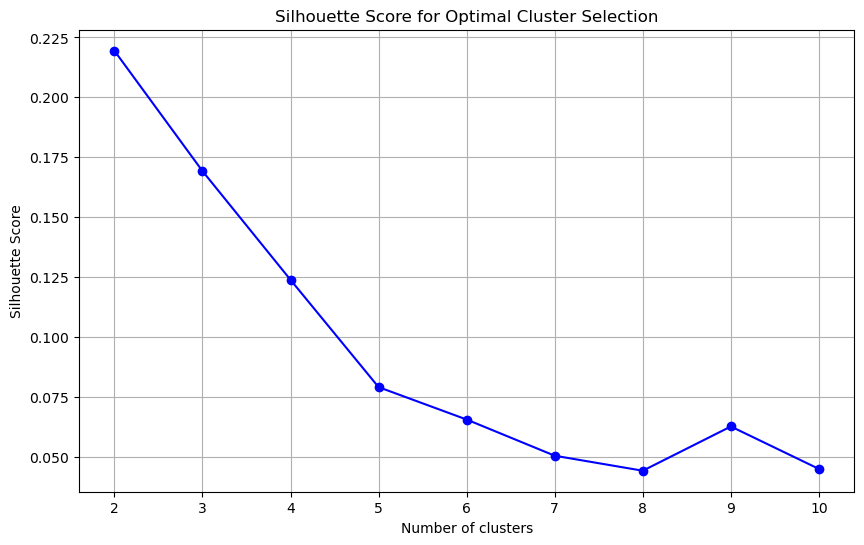


Optimal number of clusters: 2

Cluster sizes:
Cluster
0    303
1      7
Name: count, dtype: int64


In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Determine optimal number of clusters
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='average')
    cluster_labels = hierarchical.fit_predict(gower_dist_matrix)
    silhouette_avg = silhouette_score(gower_dist_matrix, cluster_labels, metric='precomputed')
    silhouette_scores.append(silhouette_avg)
    print(f"Clusters: {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Cluster Selection')
plt.grid(True)
plt.savefig('silhouette_score_plot.png')
plt.show()

# Choose the best k
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {best_k}")

# Final clustering
final_hierarchical = AgglomerativeClustering(n_clusters=best_k, metric='precomputed', linkage='average')
final_cluster_labels = final_hierarchical.fit_predict(gower_dist_matrix)

# Add cluster labels to original dataframe
df['Cluster'] = final_cluster_labels

# Analyze cluster characteristics
print("\nCluster sizes:")
print(df['Cluster'].value_counts().sort_index())